<a href="https://colab.research.google.com/github/eliezerkapish/-Linear-Regression-for-Set-Point-Prediction/blob/main/Linear_Regression_for_Set_Point_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Libraries

In [1]:
# Installing necessary libraries
!pip install requests pandas

import requests
import pandas as pd





## Connecting to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [3]:
# Path to the bakery_5days.csv file
file_path = '/content/drive/MyDrive/bakery_5days.csv'


## Load the CSV file

In [4]:
croissant = pd.read_csv(file_path, encoding='latin1')
# Display the first few rows
croissant.head()

# Display the first few rows of the file
croissant.head()


,Date,Hour,Power (kWh),Set Point (°C),External Temp. (°C),Delta (Temp. Ambiente),Order Rate (%),Efficiency (%)
0,11/26/2024,8:00,2.9,190,23.5,166.5,92,55.26
1,11/26/2024,9:00,2.5,180,24.5,155.5,30,19.29
2,11/26/2024,10:00,2.7,185,20.5,164.5,92,55.93
3,11/26/2024,11:00,2.9,190,21.5,168.5,52,30.86
4,11/26/2024,12:00,2.5,180,22.5,157.5,62,39.37


## Data Type

In [5]:
croissant.info()
croissant.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    50 non-null     object 
 1   Hour                    50 non-null     object 
 2   Power (kWh)             50 non-null     float64
 3   Set Point (°C)          50 non-null     int64  
 4   External Temp. (°C)     50 non-null     float64
 5   Delta (Temp. Ambiente)  50 non-null     float64
 6   Order Rate (%)          50 non-null     int64  
 7   Efficiency (%)          50 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 3.2+ KB


,0
Date,0
Hour,0
Power (kWh),0
Set Point (°C),0
External Temp. (°C),0
Delta (Temp. Ambiente),0
Order Rate (%),0
Efficiency (%),0


## Describe

In [6]:
croissant.describe()


,Power (kWh),Set Point (°C),External Temp. (°C),Delta (Temp. Ambiente),Order Rate (%),Efficiency (%)
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2.720000,185.500000,23.500000,162.000000,62.560000,38.605600
std,0.167819,4.195479,1.597191,4.255848,20.087726,12.319722
min,2.500000,180.000000,20.500000,153.500000,30.000000,18.620000
25%,2.500000,180.000000,22.500000,158.625000,48.000000,29.247500
50%,2.700000,185.000000,23.500000,163.000000,60.500000,36.775000
75%,2.900000,190.000000,24.500000,165.500000,78.000000,49.840000
max,2.900000,190.000000,26.500000,168.500000,99.000000,60.370000


## Dropping the 'Date' column from the dataset

In [7]:
# Dropping the 'Date' column from the dataset
croissant_drop = croissant.drop(columns=['Date', 'Hour'])

# Displaying the first few rows to confirm the change
print(croissant_drop.head())

   Power (kWh)  Set Point (°C)  External Temp. (°C)  Delta (Temp. Ambiente)  \
0          2.9             190                 23.5                   166.5   
1          2.5             180                 24.5                   155.5   
2          2.7             185                 20.5                   164.5   
3          2.9             190                 21.5                   168.5   
4          2.5             180                 22.5                   157.5   

   Order Rate (%)  Efficiency (%)  
0              92           55.26  
1              30           19.29  
2              92           55.93  
3              52           30.86  
4              62           39.37  


## Correlation Matrix

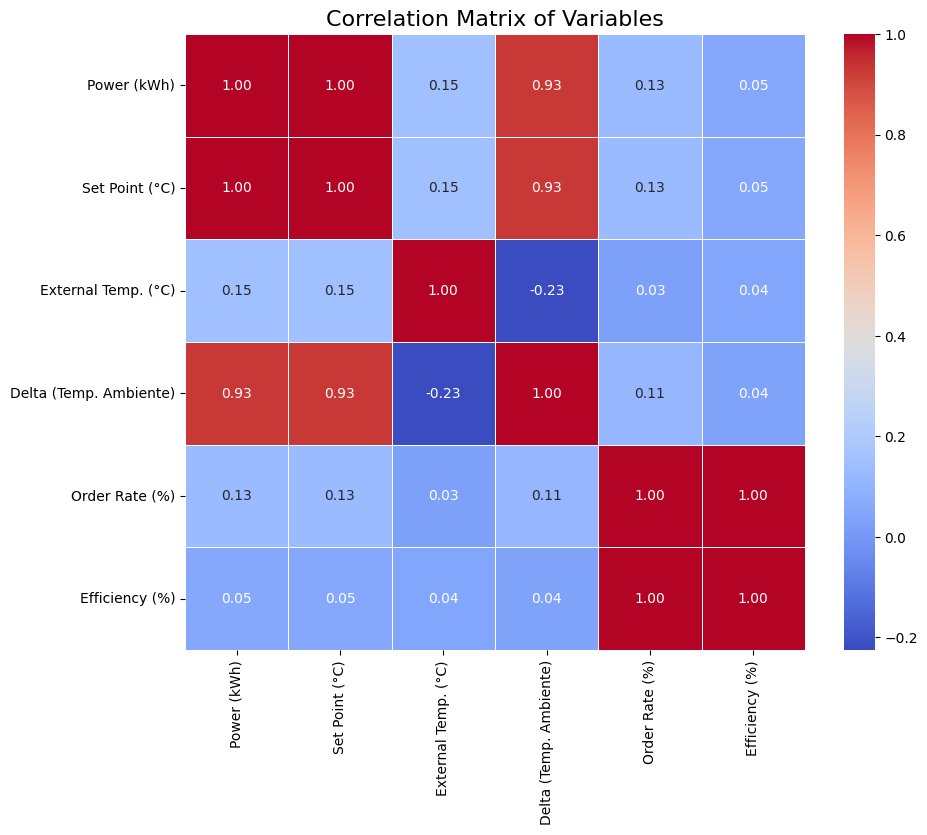

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = croissant_drop.corr()  # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding title
plt.title('Correlation Matrix of Variables', fontsize=16)
plt.show()


## Predictive Modeling

### Linear Regression for Set Point Prediction

Mean Absolute Error: 1.2804868429604455
R² Score: 0.7850217738426443


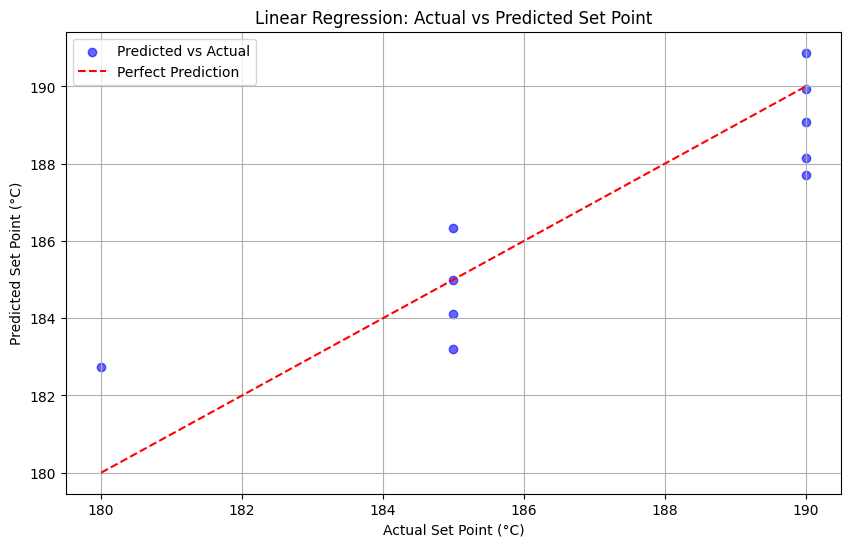

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Features and target
X = croissant[['Delta (Temp. Ambiente)', 'Efficiency (%)']]  # Independent variables
y = croissant['Set Point (°C)']  # Target variable (Set Point)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r2_score = model.score(X_test, y_test)  # Calculate R² score

print('Mean Absolute Error:', mae)
print('R² Score:', r2_score)

# Plotting actual vs predicted Set Point
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Set Point (°C)')
plt.ylabel('Predicted Set Point (°C)')
plt.title('Linear Regression: Actual vs Predicted Set Point')
plt.legend()
plt.grid()
plt.show()

